In [173]:
import pandas as pd
from sklearn.cluster import DBSCAN , KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('/content/data.csv')

In [147]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [148]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [149]:
print(df.shape)

(440, 8)


In [164]:
X = df.drop(columns = ['Channel','Region','Frozen','Delicassen',"Fresh"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: "['Channel', 'Region', 'Frozen', 'Delicassen', 'Fresh'] not found in axis"

In [165]:
df

,Milk,Grocery,Detergents_Paper
0,9656,7561,2674
1,9810,9568,3293
2,8808,7684,3516
3,1196,4221,507
4,5410,7198,1777
...,...,...,...
435,12051,16027,182
436,1431,764,93
437,15488,30243,14841
438,1981,2232,168


In [166]:
dbscan = DBSCAN(eps = 1, min_samples = 5)
Y = dbscan.fit_predict(X_scaled)

In [167]:
df["Cluster"] = Y
df.head()

,Milk,Grocery,Detergents_Paper,Cluster
0,9656,7561,2674,0
1,9810,9568,3293,0
2,8808,7684,3516,0
3,1196,4221,507,0
4,5410,7198,1777,0


In [168]:
print(df['Cluster'].value_counts())


Cluster
 0    426
-1     14
Name: count, dtype: int64


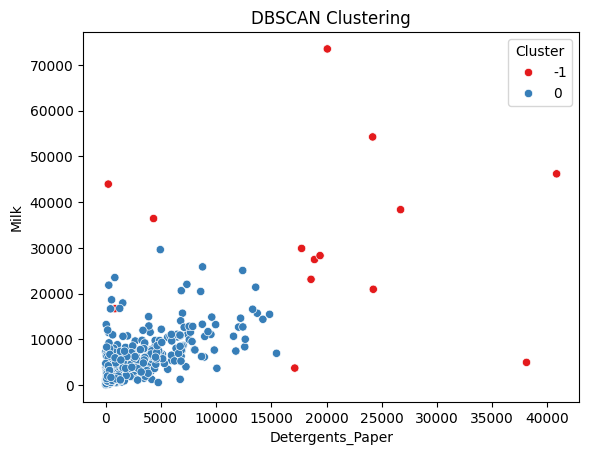

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["Detergents_Paper"], y=df['Milk'], hue=df['Cluster'], data=df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()


In [170]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


                 Milk       Grocery  Detergents_Paper
Cluster                                              
-1       31994.571429  41122.571429      19377.428571
 0        4935.288732   6861.140845       2339.373239


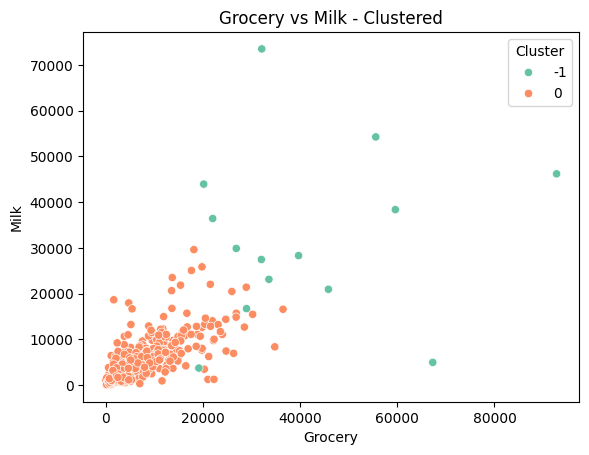

In [171]:
sns.scatterplot(x=df["Grocery"], y=df['Milk'], hue=df['Cluster'], palette='Set2')
plt.title("Grocery vs Milk - Clustered")
plt.show()


In [175]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++')
Y_kmeans = kmeans.fit_predict(X_scaled)

In [176]:
df['k_clusters'] = Y_kmeans

In [177]:
df.head()

,Milk,Grocery,Detergents_Paper,Cluster,k_clusters
0,9656,7561,2674,0,1
1,9810,9568,3293,0,1
2,8808,7684,3516,0,1
3,1196,4221,507,0,4
4,5410,7198,1777,0,1


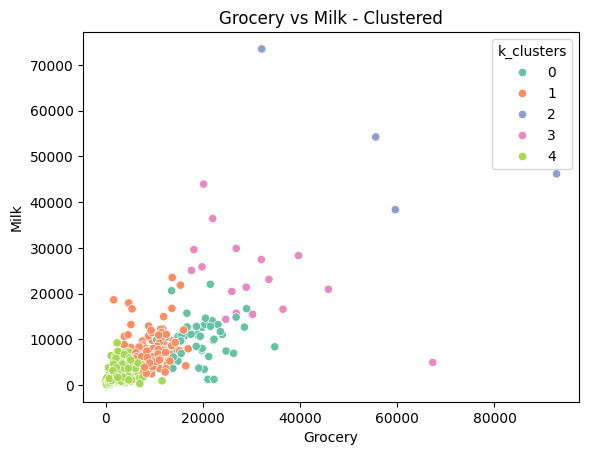

In [178]:
sns.scatterplot(x=df["Grocery"], y=df['Milk'], hue=df['k_clusters'], palette='Set2')
plt.title("Grocery vs Milk - Clustered")
plt.show()